## Global Solution - IA

In [359]:
# Inicialização das bibliotecas
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [360]:
#Importando o dataframe que foi baixado do GitHub
df = pd.read_csv("dataset_tomate.csv", index_col=0)

#Verificando os dados do datafame
df.head()

,trat,NDVI_d28,SAVI_d28,GNDVI_d28,MCARI1_d28,SR_d28,NDVI_d01,SAVI_d01,GNDVI_d01,MCARI1_d01,...,SAVI_d04,GNDVI_d04,MCARI1_d04,SR_d04,NDVI_d08,SAVI_d08,GNDVI_d08,MCARI1_d08,SR_d08,Classe
id,,,,,,,,,,,,,,,,,,,,,
1,102,0.798284,1.197380,0.692652,16710.29721,9.728142,0.729767,1.094620,0.698726,21499.94698,...,1.069718,0.662425,13090.11459,6.216968,0.684125,1.026146,0.636865,13352.81776,5.421333,1
2,11,0.806955,1.210392,0.705323,19513.85630,10.557411,0.774359,1.161514,0.717367,30041.91766,...,1.166604,0.680269,22731.09954,8.380453,0.725521,1.088240,0.669113,16190.82038,6.491860,0
3,103,0.825104,1.237610,0.708468,18074.06986,11.141408,0.786941,1.180385,0.730471,29312.17626,...,1.096008,0.680238,12330.21702,6.670915,0.728171,1.092214,0.655206,15313.16198,6.551268,1
4,112,0.788884,1.183279,0.664787,16226.23017,8.990752,0.743874,1.115782,0.690141,22610.47885,...,1.061948,0.644786,12085.07787,6.017714,0.728161,1.092201,0.640739,16562.17418,6.608121,1
5,114,0.764986,1.147432,0.673490,14920.80711,8.269806,0.715948,1.073894,0.695619,22002.08151,...,1.032176,0.660206,10053.17885,5.571702,0.694320,1.041437,0.642373,13760.95583,5.665567,1


In [361]:
#Verificando informações do dataframe
#Principalmente que NÃO HÁ DADOS FALTANTES no dataframe, 100% deles estão preenchidos
#E que também NÃO HÁ DADOS CATEGÓRICOS 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 1 to 132
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   trat        132 non-null    int64  
 1   NDVI_d28    132 non-null    float64
 2   SAVI_d28    132 non-null    float64
 3   GNDVI_d28   132 non-null    float64
 4   MCARI1_d28  132 non-null    float64
 5   SR_d28      132 non-null    float64
 6   NDVI_d01    132 non-null    float64
 7   SAVI_d01    132 non-null    float64
 8   GNDVI_d01   132 non-null    float64
 9   MCARI1_d01  132 non-null    float64
 10  SR_d01      132 non-null    float64
 11  NDVI_d04    132 non-null    float64
 12  SAVI_d04    132 non-null    float64
 13  GNDVI_d04   132 non-null    float64
 14  MCARI1_d04  132 non-null    float64
 15  SR_d04      132 non-null    float64
 16  NDVI_d08    132 non-null    float64
 17  SAVI_d08    132 non-null    float64
 18  GNDVI_d08   132 non-null    float64
 19  MCARI1_d08  132 non-null    f

<AxesSubplot:>

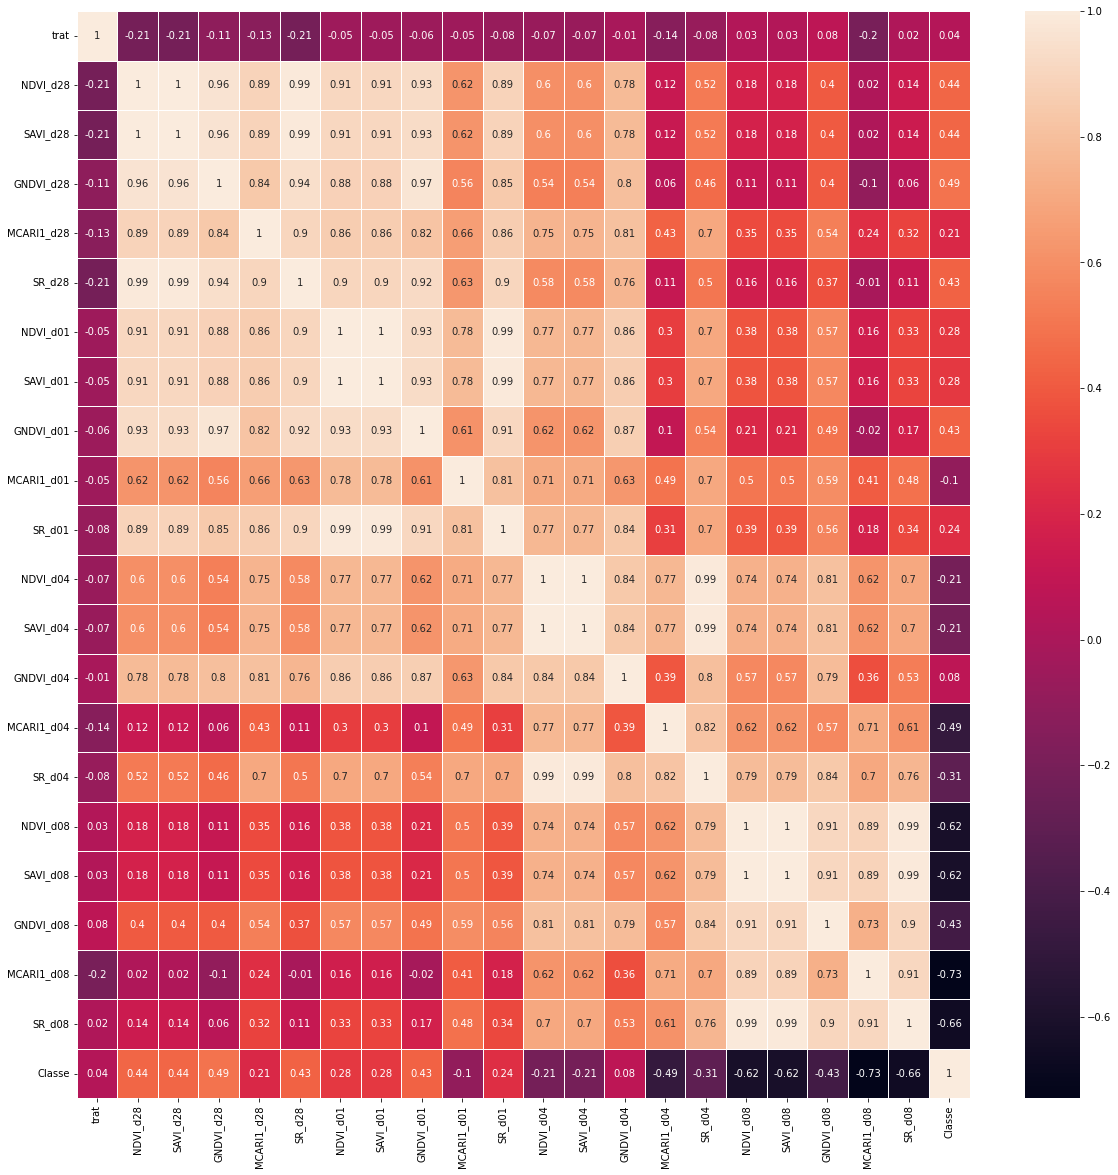

In [362]:
#Vamos explorar um pouco uma matriz de correlação

import seaborn as sns 
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(20,20))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [363]:
#Notamos que, na matriz de correlação, somente os seguintes atributos possuem uma correlação considerável com o target: 
# NDVI_d08, SAVI_d08, MCARI1_d08, SR_d08

#Com essa etapa concluída, vamos criar um sub-dataset com os atributos que serão utilizados.

# Atributos independentes:
X = df[['NDVI_d08', 'SAVI_d08', 'MCARI1_d08', 'SR_d08']]

#Atributo dependente:
Y = df['Classe']

In [364]:
from sklearn.model_selection import train_test_split

# Separando 20% dos dados para o teste e 80% para o treino
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

In [365]:
# Agora é a hora de aplicar o nosso modelo preditivo
# E para isso, vamos fazer a predição por APRENDIZADO SUPERVISIONADO, pois os targets já foram informados no dataframe
# O modelo utilizado é o DE CLASSIFICAÇÃO, pois estamos buscando um resultado categorico, e não um valor contínuo.
# O algoritmo de classificação utilizado será o KNN, que realiza a classificação com base nos outros elementos/vizinhos mais próximos.


# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Criando o algoritmo de classificação:

# K = Número de vizinhos mais próximos que serão utilizados para fazer a classificação
k = 4
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(X_treino, Y_treino)


KNeighborsClassifier(n_neighbors=4)

In [366]:
# Para obter as previsões, basta chamar o método predict()
Y_predito = modelo.predict(X_teste)

print("Predição: {}".format(Y_predito))

Predição: [1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0]


In [367]:
# Determinando a quantidade de acertos (acuracia)

from sklearn.metrics import accuracy_score
acertos = accuracy_score(Y_teste, Y_predito)
print("Acerto médio de classificação: ", acertos.round(2)*100, "%")

Acerto médio de classificação:  93.0 %


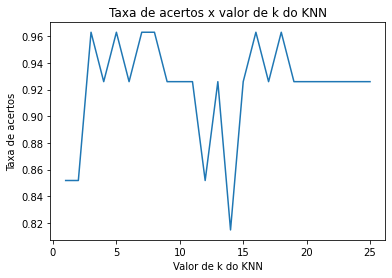

In [368]:
# Loop for para diferentes KNN 
k_range = list(range(1,26))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_treino, Y_treino)
    Y_predito = modelo.predict(X_teste)
    acertos.append(accuracy_score(Y_teste, Y_predito))
  
  
plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()